
# Covid-19 Overview in Greece

## Table of contents
* [Introduction](#introduction)
* [Data](#data)
* [New cases graph](#new_cases_graph)
* [New deaths graph](#new_deaths_graph)
* [Total cases graph](#total_cases_graph)
* [Total deaths graph](#total_deaths_graph)
* [Prediction of total cases](#prediction_total_cases)
* [Prediction of total deaths](#prediction_total_deaths)
* [Prediction of new deaths](#prediction_new_deaths)
* [Prediction of new cases](#prediction_new_cases)

# Introduction <a name="introduction"></a>



## Data <a name="data"></a>

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns
import scipy
import plotly
import folium
from folium import plugins
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition
from lime import lime_tabular
import plotly.express as px
import plotly.graph_objects as go
import os

In [88]:
!wget -nv https://covid19.who.int/WHO-COVID-19-global-data.csv
print('File downloaded!')
file_name=('WHO-COVID-19-global-data.csv')
df_raw=pd.read_csv(file_name)
print('File copied to DataFrame!')
os.remove("WHO-COVID-19-global-data.csv")
print("File Removed!")

File downloaded!
File copied to DataFrame!
File Removed!


2020-12-11 18:59:59 URL:https://covid19.who.int/WHO-COVID-19-global-data.csv [3444290/3444290] -> "WHO-COVID-19-global-data.csv" [1]


In [89]:
df_raw.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0


#### Removing data from all the countries except Greece

In [90]:
df_raw=df_raw[df_raw['Country'].str.contains('Greece')]
df_raw.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
27823,2020-01-03,GR,Greece,EURO,0,0,0,0
27824,2020-01-04,GR,Greece,EURO,0,0,0,0
27825,2020-01-05,GR,Greece,EURO,0,0,0,0
27826,2020-01-06,GR,Greece,EURO,0,0,0,0
27827,2020-01-07,GR,Greece,EURO,0,0,0,0


#### Removing unnecessary data columns

In [91]:
df_raw=df_raw.drop(columns=["Country_code", "WHO_region", "Country"])
df_raw.head()

,Date_reported,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
27823,2020-01-03,0,0,0,0
27824,2020-01-04,0,0,0,0
27825,2020-01-05,0,0,0,0
27826,2020-01-06,0,0,0,0
27827,2020-01-07,0,0,0,0


#### Renaming columns

In [92]:
df_raw=df_raw.rename(columns={"Cumulative_cases": "Total_cases", "Cumulative_deaths": "Total_deaths"})
df_raw.head()

,Date_reported,New_cases,Total_cases,New_deaths,Total_deaths
27823,2020-01-03,0,0,0,0
27824,2020-01-04,0,0,0,0
27825,2020-01-05,0,0,0,0
27826,2020-01-06,0,0,0,0
27827,2020-01-07,0,0,0,0


#### Sorting the dataframe by Date

In [93]:
df_raw=df_raw.sort_values(by='Date_reported', ascending=False)
df_raw.head()

,Date_reported,New_cases,Total_cases,New_deaths,Total_deaths
28165,2020-12-10,1675,119720,95,3289
28164,2020-12-09,1324,118045,102,3194
28163,2020-12-08,1250,116721,89,3092
28162,2020-12-07,903,115471,101,3003
28161,2020-12-06,1383,114568,98,2902


#### Converting 'Date_reported' to datetime

In [94]:
df_raw.Date_reported = pd.to_datetime(df_raw.Date_reported).dt.date

In [95]:
df_raw.head(10)

,Date_reported,New_cases,Total_cases,New_deaths,Total_deaths
28165,2020-12-10,1675,119720,95,3289
28164,2020-12-09,1324,118045,102,3194
28163,2020-12-08,1250,116721,89,3092
28162,2020-12-07,903,115471,101,3003
28161,2020-12-06,1383,114568,98,2902
28160,2020-12-05,1648,113185,98,2804
28159,2020-12-04,1882,111537,100,2706
28158,2020-12-03,2185,109655,89,2606
28157,2020-12-02,2199,107470,111,2517
28156,2020-12-01,1044,105271,85,2406


#### Correcting the deviation of the day

In [96]:
df_copy = df_raw.copy()
df_copy['Date_reported']=df_copy['Date_reported'].shift(-1)
df_copy.head()

,Date_reported,New_cases,Total_cases,New_deaths,Total_deaths
28165,2020-12-09,1675,119720,95,3289
28164,2020-12-08,1324,118045,102,3194
28163,2020-12-07,1250,116721,89,3092
28162,2020-12-06,903,115471,101,3003
28161,2020-12-05,1383,114568,98,2902


In [97]:
df_copy = df_copy.iloc[:-310]

In [98]:
df_copy=df_copy.sort_values(by='Total_cases', ascending=True)

In [99]:
df_copy.style.background_gradient(cmap='Reds')

,Date_reported,New_cases,Total_cases,New_deaths,Total_deaths
28133,2020-11-07,2555,54809,34,749
28134,2020-11-08,1889,56698,35,784
28135,2020-11-09,1489,58187,41,825
28136,2020-11-10,2383,60570,41,866
28137,2020-11-11,2751,63321,43,909
28138,2020-11-12,3316,66637,50,959
28139,2020-11-13,3038,69675,38,997
28140,2020-11-14,2835,72510,38,1035
28141,2020-11-15,1695,74205,71,1106
28142,2020-11-16,2198,76403,59,1165


# New cases graph<a name="new_cases_graph"></a>

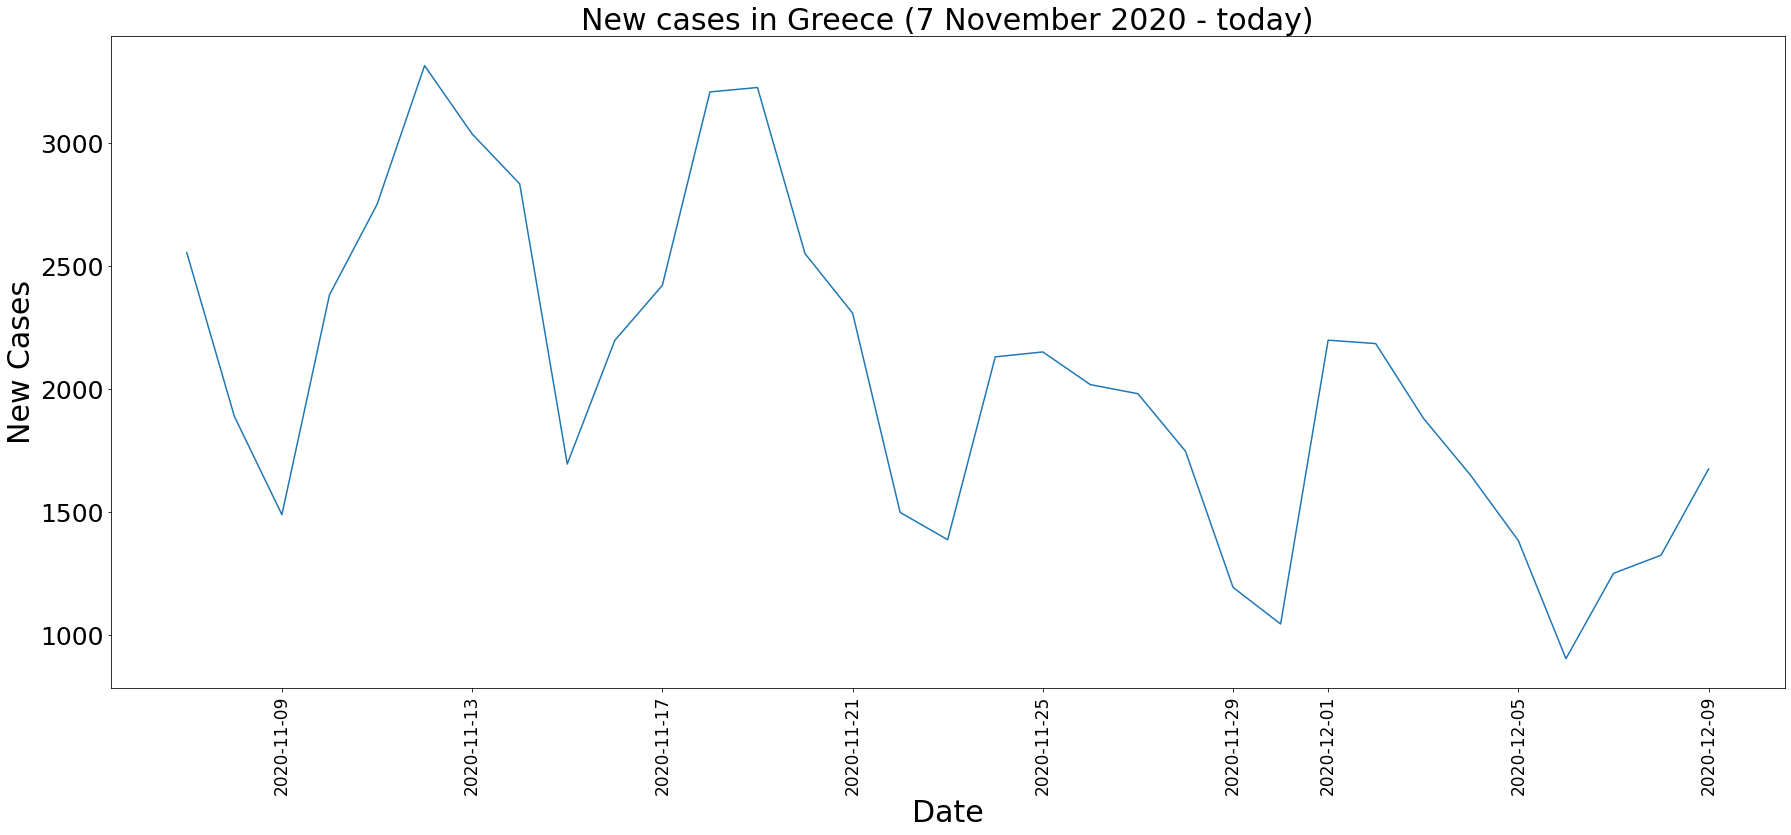

In [100]:
plt.figure(figsize=(30,12))
plt.title('New cases in Greece (7 November 2020 - today)', fontsize=30)
plt.ylabel('New Cases', fontsize=30)
plt.xlabel('Date', fontsize=30)
plt.xticks(rotation=90)
plt.tick_params(axis='x', labelsize=17)
plt.tick_params(axis='y', labelsize=25)
plt.plot(df_copy['Date_reported'], df_copy['New_cases'])

# New deaths graph<a name="new_deaths_graph"></a>

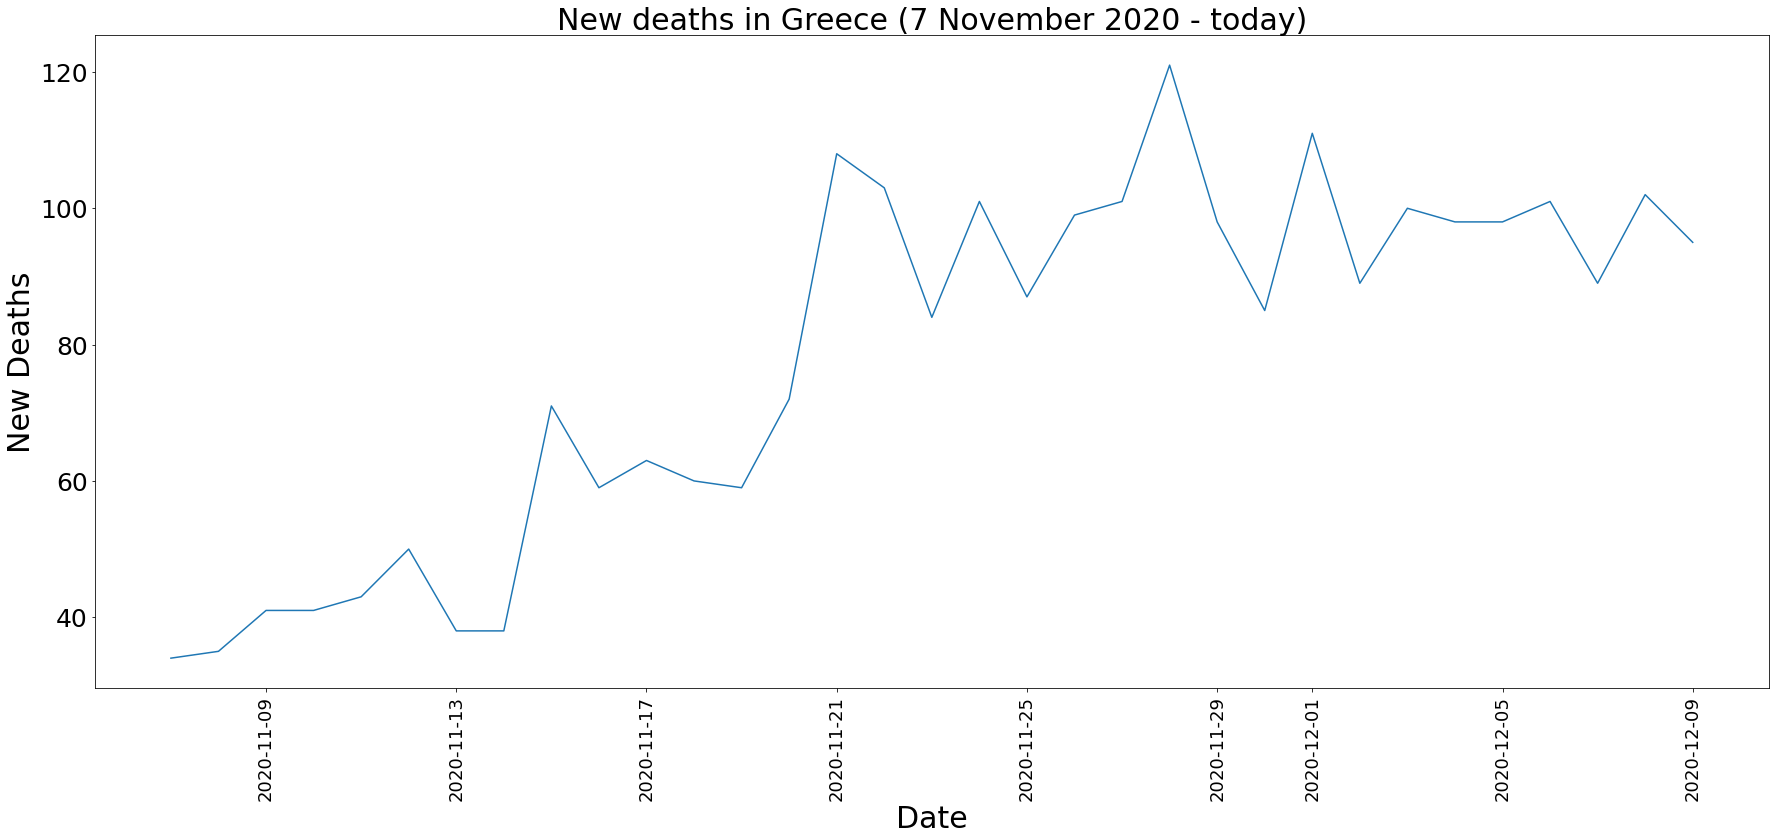

In [101]:
plt.figure(figsize=(30,12))
plt.title('New deaths in Greece (7 November 2020 - today)',fontsize=30)
plt.ylabel('New Deaths',fontsize=30)
plt.xlabel('Date',fontsize=30)
plt.xticks(rotation=90)
plt.tick_params(axis='y', labelsize=25)
plt.tick_params(axis='x', labelsize=18)
plt.plot(df_copy['Date_reported'], df_copy['New_deaths'])

# Total cases graph<a name="total_cases_graph"></a>

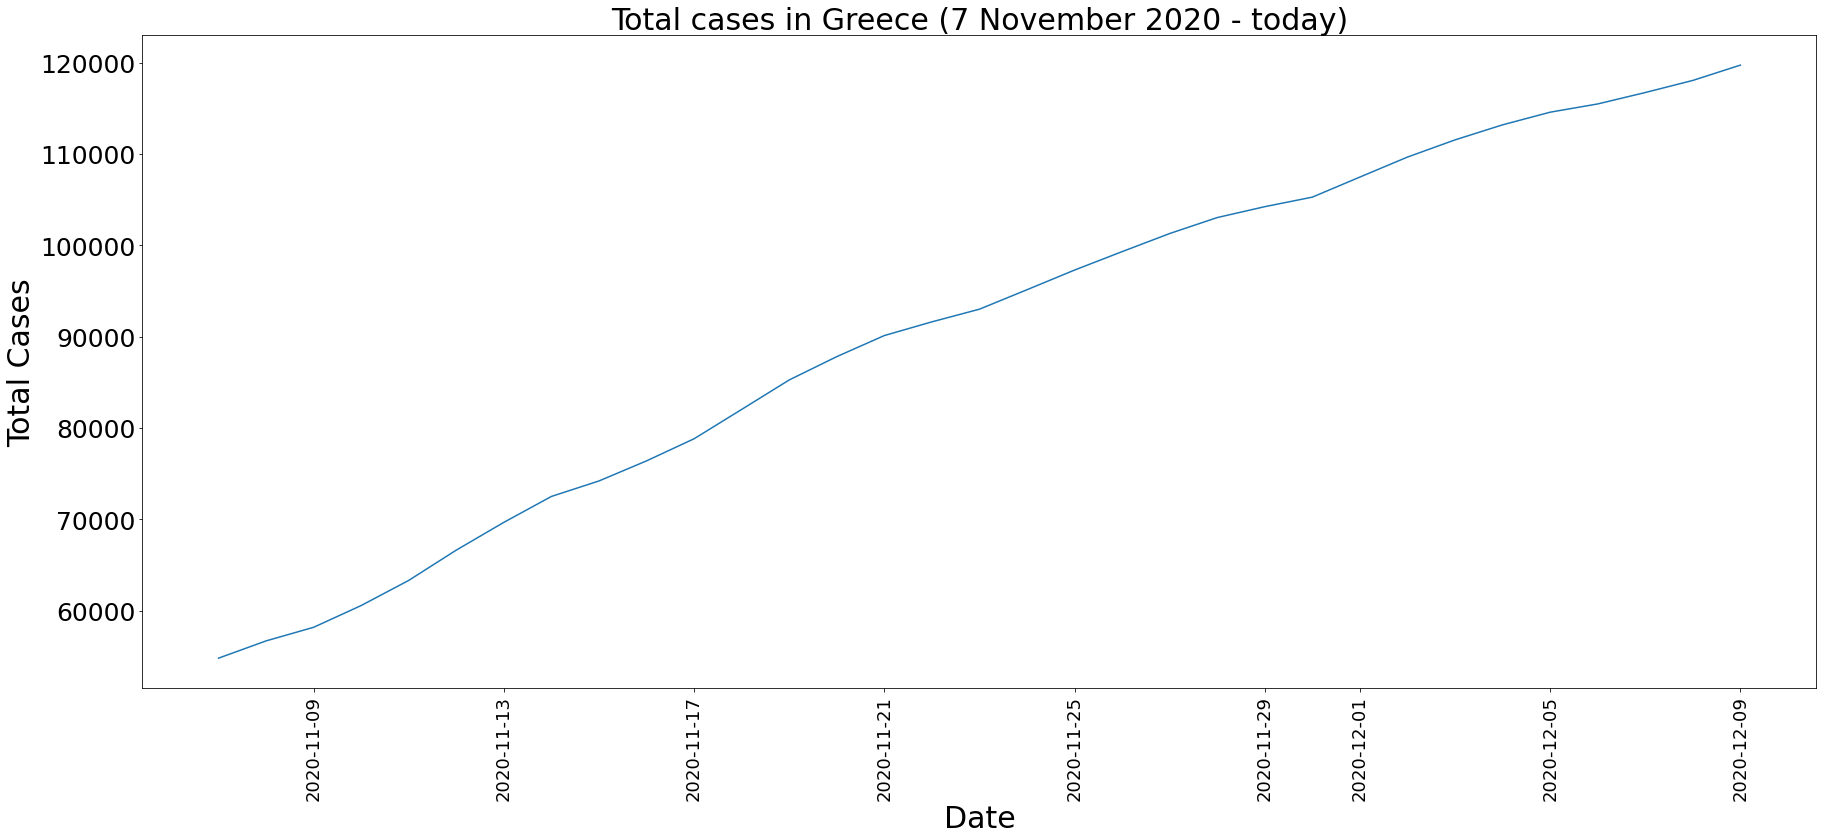

In [102]:
plt.figure(figsize=(30,12))
plt.title('Total cases in Greece (7 November 2020 - today)',fontsize=30)
plt.ylabel('Total Cases',fontsize=30)
plt.xlabel('Date',fontsize=30)
plt.xticks(rotation=90)
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=25)
plt.plot(df_copy['Date_reported'], df_copy['Total_cases'])

# Total deaths graph<a name="total_deaths_graph"></a>

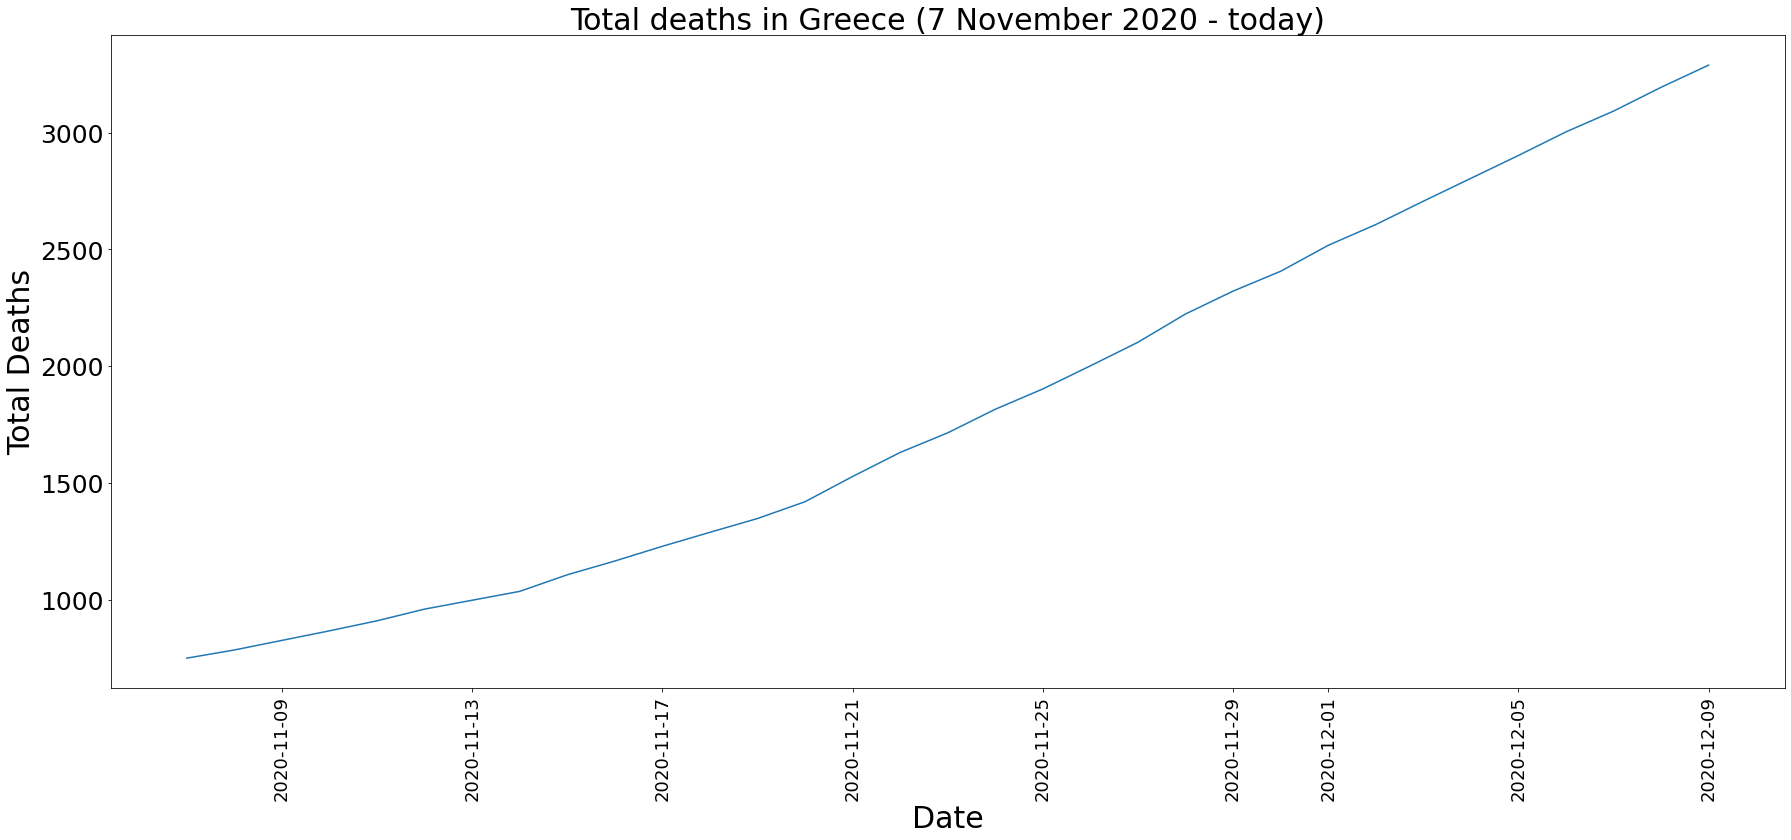

In [103]:
plt.figure(figsize=(30,12))
plt.title('Total deaths in Greece (7 November 2020 - today)',fontsize=30)
plt.ylabel('Total Deaths',fontsize=30)
plt.xlabel('Date',fontsize=30)
plt.xticks(rotation=90)
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=25)
plt.plot(df_copy['Date_reported'], df_copy['Total_deaths'])

## Using Prophet to predict covid-19 behavior to 1 week from today

In [104]:
from fbprophet import Prophet

In [105]:
new_cases=df_copy.groupby('Date_reported').sum()['New_cases'].reset_index()
new_deaths=df_copy.groupby('Date_reported').sum()['New_deaths'].reset_index()
total_cases=df_copy.groupby('Date_reported').sum()['Total_cases'].reset_index()
total_deaths=df_copy.groupby('Date_reported').sum()['Total_deaths'].reset_index()

## Prediction of Total Cases<a name="prediction_total_cases"></a>

In [106]:
total_cases.tail()

,Date_reported,Total_cases
28,2020-12-05,114568
29,2020-12-06,115471
30,2020-12-07,116721
31,2020-12-08,118045
32,2020-12-09,119720


In [107]:
total_cases.columns=['ds','y']

In [108]:
m=Prophet(interval_width=0.95)
m.fit(total_cases)
future_total_cases=m.make_future_dataframe(periods=4)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [109]:
forecast_total_cases=m.predict(future_total_cases)
forecast_total_cases[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(4)

,ds,yhat,yhat_lower,yhat_upper
33,2020-12-10,121602.0,121061.912551,122167.059483
34,2020-12-11,123250.0,121892.702758,124574.899273
35,2020-12-12,124633.0,122147.140845,127147.956578
36,2020-12-13,125536.0,121614.500991,129461.090184


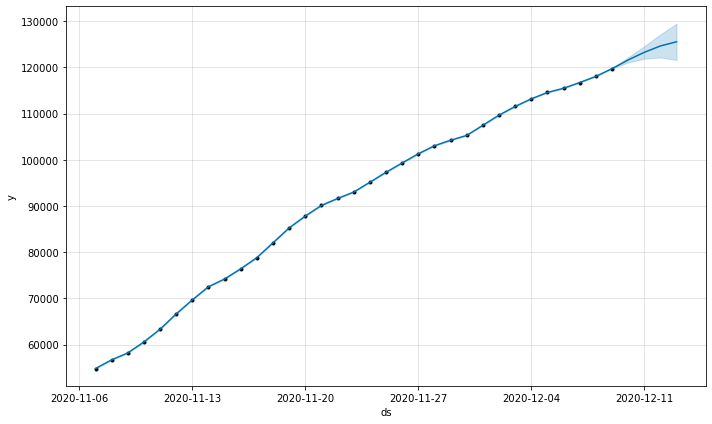

In [110]:
forecast_total_cases_plot=m.plot(forecast_total_cases)

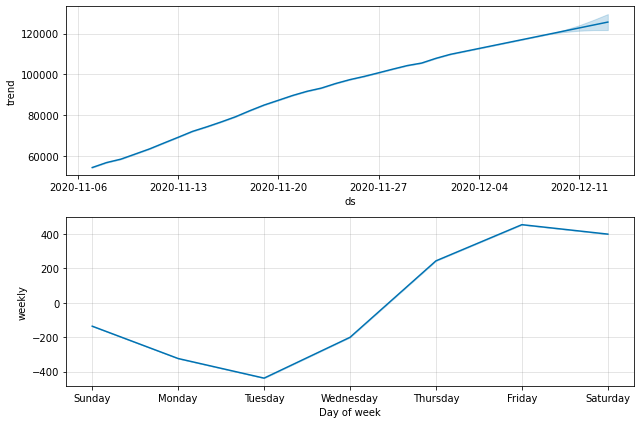

In [111]:
forecast_total_cases_plot=m.plot_components(forecast_total_cases)

## Prediction of total deaths<a name="prediction_total_deaths"></a>

In [112]:
total_deaths.tail()

,Date_reported,Total_deaths
28,2020-12-05,2902
29,2020-12-06,3003
30,2020-12-07,3092
31,2020-12-08,3194
32,2020-12-09,3289


In [113]:
total_deaths.columns=['ds','y']

In [114]:
m=Prophet(interval_width=0.95)
m.fit(total_deaths)
future_total_deaths=m.make_future_dataframe(periods=4)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [115]:
forecast_total_deaths=m.predict(future_total_deaths)
forecast_total_deaths[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(4)

,ds,yhat,yhat_lower,yhat_upper
33,2020-12-10,3389.0,3373.330676,3406.743558
34,2020-12-11,3487.0,3437.911767,3536.584347
35,2020-12-12,3585.0,3491.781939,3676.605158
36,2020-12-13,3686.0,3539.008775,3822.351883


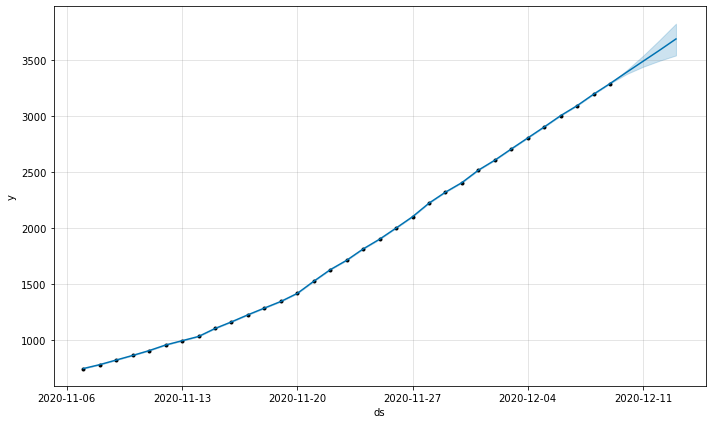

In [116]:
forecast_total_deaths_plot=m.plot(forecast_total_deaths)

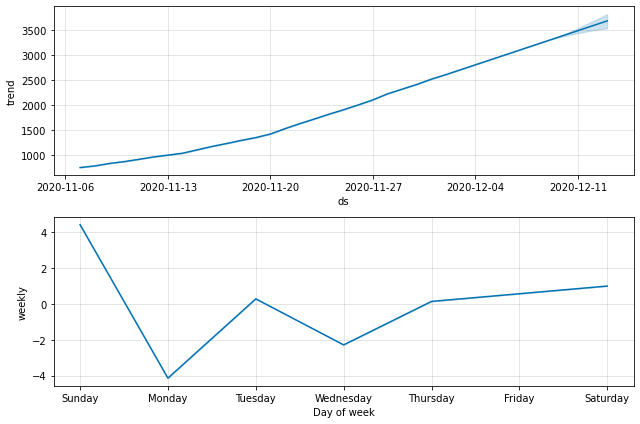

In [117]:
forecast_total_deaths_plot=m.plot_components(forecast_total_deaths)

## Prediction of new deaths <a name="prediction_new_deaths"></a>

In [118]:
new_deaths.tail()

,Date_reported,New_deaths
28,2020-12-05,98
29,2020-12-06,101
30,2020-12-07,89
31,2020-12-08,102
32,2020-12-09,95


In [119]:
new_deaths.columns=['ds','y']

In [120]:
m=Prophet(interval_width=0.95)
m.fit(new_deaths)
future_new_deaths=m.make_future_dataframe(periods=4)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [121]:
forecast_new_deaths=m.predict(future_new_deaths)
forecast_new_deaths[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(4)

,ds,yhat,yhat_lower,yhat_upper
33,2020-12-10,118.247214,93.681331,142.737023
34,2020-12-11,118.496355,93.579494,143.086418
35,2020-12-12,129.299659,104.375112,155.650136
36,2020-12-13,131.094612,106.276205,155.354114


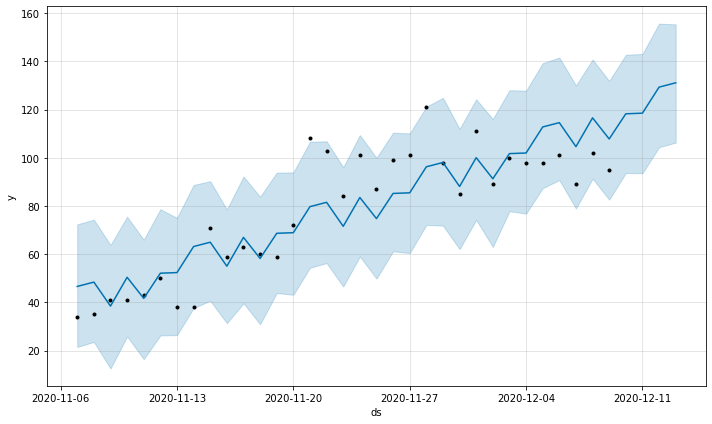

In [122]:
forecast_new_deaths_plot=m.plot(forecast_new_deaths)

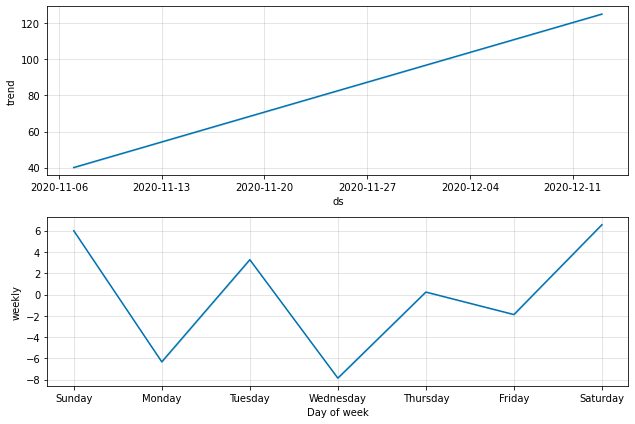

In [123]:
forecast_new_deaths_plot=m.plot_components(forecast_new_deaths)

## Prediction of new cases<a name="prediction_new_cases"></a>

In [124]:
new_cases.tail()

,Date_reported,New_cases
28,2020-12-05,1383
29,2020-12-06,903
30,2020-12-07,1250
31,2020-12-08,1324
32,2020-12-09,1675


In [125]:
new_cases.columns=['ds','y']

In [126]:
m=Prophet(interval_width=0.95)
m.fit(new_cases)
future_new_cases=m.make_future_dataframe(periods=4)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [127]:
forecast_new_cases=m.predict(future_new_cases)
forecast_new_cases[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(4)

,ds,yhat,yhat_lower,yhat_upper
33,2020-12-10,1851.017817,1340.800574,2365.782184
34,2020-12-11,1544.238622,952.595691,2073.890243
35,2020-12-12,1253.531344,721.930869,1794.502086
36,2020-12-13,522.044092,4.001548,1046.300107


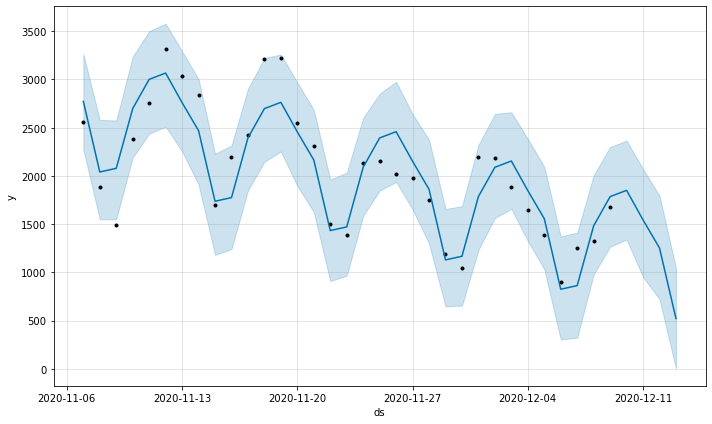

In [128]:
forecast_new_cases_plot=m.plot(forecast_new_cases)

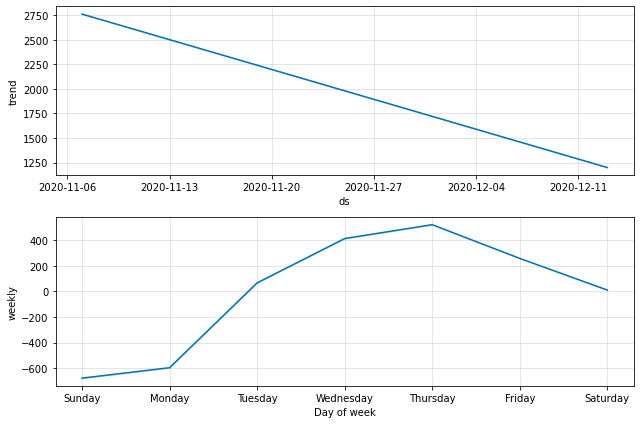

In [129]:
forecast_new_cases_plot=m.plot_components(forecast_new_cases)